In [1]:
#La presente actividad pretende buscar una visualización de una ecuación obtenida por Djaan
#para el análisis de divresos parámetros en un viñedo cerca de Bahía de Kino.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime


In [2]:
#Leer el archivo de texto a utilizar
df = pd.DataFrame( pd.read_csv("meteo-vid-2018.csv", engine="python" ) )
df['albedo_Avg'] = df['albedo_Avg'].apply(lambda col:pd.to_numeric(col, errors='coerce'))



In [3]:
df["DATETIME"] = df["Date"] + " " + df["Time"]
df.drop( ["Date","Time"], axis=1, inplace=True )

In [4]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DATETIME'], 1), dayfirst=True)
df = df.drop(['DATETIME'], 1)

In [5]:
#Ahora crearemos una columna que nos indique la fecha de cada parámetro de manera ordenada y la
#agregamos a nuestro dataframe "df"
df.head()
df['MES'] = df['FECHA'].dt.month
df['DIA'] = df['FECHA'].dt.day


In [6]:
#Almacenaremos en una nueva columna los valores máximos de algunos parámetros.
df['AirTC_Avg_max'] = df.groupby(['MES','DIA'])['AirTC_Avg'].transform('max')
df['AirTC_Avg_min'] = df.groupby(['MES','DIA'])['AirTC_Avg'].transform('min')
df['RH_max'] = df.groupby(['MES','DIA'])['RH'].transform('max')
df['RH_min'] = df.groupby(['MES','DIA'])['RH'].transform('min')
df.head()

,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,long_up_corr_Avg,long_dn_corr_Avg,...,Result8_Avg,Result9_Avg,Riego,FECHA,MES,DIA,AirTC_Avg_max,AirTC_Avg_min,RH_max,RH_min
0,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,416.77,451.00,...,14.46,13.46,0.0,2018-01-06 17:00:00,1.0,6.0,27.75,16.03,46.27,20.61
1,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,401.77,442.70,...,14.32,13.81,0.0,2018-01-06 17:30:00,1.0,6.0,27.75,16.03,46.27,20.61
2,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,395.37,431.87,...,14.51,13.84,0.0,2018-01-06 18:00:00,1.0,6.0,27.75,16.03,46.27,20.61
3,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,386.56,423.54,...,14.58,13.94,0.0,2018-01-06 18:30:00,1.0,6.0,27.75,16.03,46.27,20.61
4,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,382.87,419.49,...,14.60,14.11,0.0,2018-01-06 19:00:00,1.0,6.0,27.75,16.03,46.27,20.61


In [7]:
#Creamos un nuevo dataframe que almacene los promedios de cada parámetro.
df_prom = pd.DataFrame()

df_prom['VELVPROM'] = df.groupby(['MES'])['WS_ms_S_WVT'].transform('mean')
df_prom['TMAX'] = df.groupby(['MES'])['AirTC_Avg_max'].transform('mean')
df_prom['TMIN'] = df.groupby(['MES'])['AirTC_Avg_min'].transform('mean')
df_prom['TPROM'] = df.groupby(['MES'])['AirTC_Avg'].transform('mean')
df_prom['RHMAXPROM'] = df.groupby(['MES'])['RH_max'].transform('mean')
df_prom['RHMINPROM'] = df.groupby(['MES'])['RH_min'].transform('mean')
df_prom['RHPROM'] = df.groupby(['MES'])['RH'].transform('mean')
df_prom['RADSOLPROM'] = df.groupby(['MES'])['Rn_Avg'].transform('mean')
df_prom['ALBEDOPROM'] = df.groupby(['MES'])['albedo_Avg'].transform('mean')

df_prom = df_prom.drop_duplicates(subset=['VELVPROM','TMAX','TMIN','RHMAXPROM','RHMINPROM','RHPROM','RADSOLPROM','ALBEDOPROM']) 
df_prom = df_prom.dropna(how='any')

MESES = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']
df_prom = df_prom.reset_index(drop=True)

In [8]:
#Comenzaremos a graficar
Ejex = MESES
n=np.arange(len(MESES))
Ejey1=df_prom['TMAX']
Ejey2=df_prom['TMIN']
Ejey3=df_prom['TPROM']


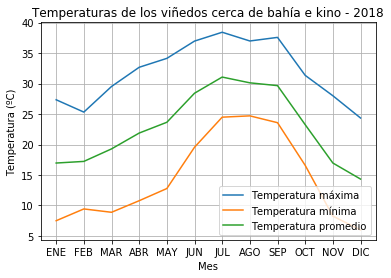

In [9]:
plt.plot(Ejex, Ejey1, label="Temperatura máxima")         
plt.xlabel("Mes")                                   
plt.ylabel("Temperatura (ºC)")                  

plt.grid()

plt.plot(Ejey2, label="Temperatura mínima")             

plt.plot(Ejey3, label="Temperatura promedio")             

plt.legend()                                                
plt.title('Temperaturas de los viñedos cerca de bahía e kino - 2018') 
plt.savefig('tmensual',plt=2000)                            
plt.show() 

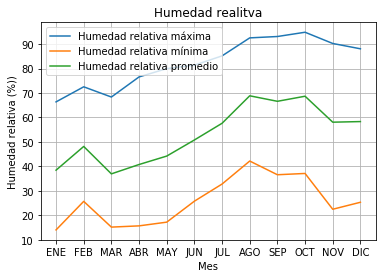

In [10]:

Ejey4 = df_prom['RHMAXPROM']          
Ejey5= df_prom['RHMINPROM']          
Ejey6 = df_prom['RHPROM']         
plt.plot(Ejex, Ejey4, label="Humedad relativa máxima")  
plt.xlabel("Mes")                                           
plt.ylabel("Humedad relativa (%))")                             
plt.grid()
plt.plot(Ejey5, label="Humedad relativa mínima")   
plt.legend()                                            
plt.plot(Ejey6, label="Humedad relativa promedio")  
plt.legend()                                                
plt.title('Humedad realitva')  
plt.savefig('rhmensual',plt=2000)                            
plt.show()                         

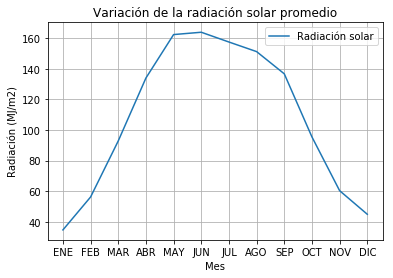

In [11]:
          
Ejey7 = df_prom['RADSOLPROM']           

plt.plot(Ejex, Ejey7, label="Radiación solar")          
plt.xlabel("Mes")                                                         
plt.ylabel("Radiación (MJ/m2)")                                           
plt.grid()
plt.legend()                                                            
plt.title('Variación de la radiación solar promedio')  
plt.savefig('radmensual',plt=2000)                                        
plt.show()

In [12]:
#Parte 2 de la evaluación

In [13]:
#Según la ecuación 7 del artpiculo podemos calcular la evotranspiración. Usaremos esta misma
#para llenar un arreglo con los resultados de estos cálculos.
ETec7 = []
for i in range (0,len(df_prom)):
    ETec7.append((0.0252*df_prom['TPROM'][i] + 0.078)*df_prom['RADSOLPROM'][i])
    
psi = (math.pi/180)*28.94917
ETec31 = []
for i in range (0,len(df_prom)):
    ETec31.append(0.0393*df_prom['RADSOLPROM'][i]*(df_prom['TPROM'][i] + 9.5)**0.5 - 0.19*(df_prom['RADSOLPROM'][i]**0.6)*(psi**0.15) + 0.0061*(df_prom['TPROM'][i] + 20)*(1.11*df_prom['TPROM'][i] - df_prom['TMIN'][i] - 2)**0.7)

In [14]:
#Ahora calcularemos los siguientes parámetros con las ecuaciones propuestas en el artículo.
# Gsc es la constante solar (Gsc=0.0820 MJm^-2min^-1)
#    dr = distancia relativa entre la Tierra y el Sol
#    omega = ángulo de la hora donde se oculta el sol
#    phi = latitud (rad)
#    delta = declinación solar (rad)
dr = []
delta = []
omega = []

for m in range (0,len(df_prom)):
    j = int(30.4*m - 15)
    dr.append(1 + 0.033*math.cos(((2*math.pi)/365)*j))
    delta.append(0.409*math.sin(((2*math.pi)/365)*j - 1.39))
    omega.append(math.acos(-math.tan(psi)*math.tan(0.409*math.sin(((2*math.pi)/365)*j - 1.39))))
###########################################################################################3
df_v = pd.DataFrame()
df_v['dr'] = dr
df_v['dr'] = df_v['dr'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
df_v['delta'] = delta
df_v['delta'] = df_v['delta'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
df_v['omega'] = omega
df_v['omega'] = df_v['omega'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

psi = (math.pi/180)*28.94917
df_v

,dr,delta,omega
0,1.031906,-0.407775,1.329507
1,1.031906,-0.370216,1.354428
2,1.023584,-0.236097,1.437322
3,1.008564,-0.033386,1.552321
4,0.991711,0.172248,1.667178
5,0.976615,0.336995,1.765832
6,0.968168,0.407488,1.811891
7,0.968023,0.371698,1.788131
8,0.976615,0.233213,1.702570
9,0.991162,0.036894,1.591215


In [15]:
#Ahora ya podemos calcular la radiación solar en cada mes.
Rs = []
for i in range (0,len(df_prom)):
    Rs.append(((24*60)/math.pi)*0.0820*(df_v['omega'][i]*math.sin(psi)*math.sin(df_v['delta'][i]) + math.cos(psi)*math.cos(df_v['delta'][i])*math.sin(df_v['omega'][i])))
df_v['Rs'] = Rs
df_v['Rs'] = df_v['Rs'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
    

In [16]:
ETec34 = [] 
for i in range (0,len(df_prom)):
    ETec34.append(0.051*(1 - df_prom['ALBEDOPROM'][i])*df_prom['RADSOLPROM'][i]*(df_prom['TPROM'][i] + 9.5)**0.5 - 2.4*(df_prom['RADSOLPROM'][i]/df_v['Rs'][i])**2 + 0.048*(df_prom['TPROM'][i] + 20)*(1 - df_prom['RHPROM'][i]/100)*(0.5 + 0.536*df_prom['VELVPROM'][i]) + 0.00012*101)

df_n = pd.DataFrame()
df_n['ETec7'] = ETec7
df_n['ETec31'] = ETec31
df_n['ETec34'] = ETec34

df_n['MES']=MESES
df_n.set_index('MES')

,ETec7,ETec31,ETec34
MES,,,
ENE,17.558177,6.657568,7.229301
FEB,28.811594,10.451888,6.225899
MAR,52.384876,18.229801,5.988913
ABR,84.346631,27.675580,12.721210
MAY,109.458090,34.580933,22.018419
JUN,130.171712,37.491710,34.816797
JUL,135.614481,37.196379,29.379138
AGO,126.623032,35.098257,36.723789
SEP,112.882131,31.574853,36.355425


In [17]:
#Parte 3
#En esta parte utilizaremos el archivo de datos de flujos.
#A través de un Balance de Energía también es posible determinar la fracción de Evapotranspiración o Calor Latente λET mediante la ecuación:
#Rn - G - λET  - H  = 0
#Donde Rn-G es la radiación neta (Rg_f), λET  es el calor latente (LE_f) y H es el calor sensible (H_f).
df2 = pd.DataFrame( pd.read_csv("flujos-vid-2018.csv", engine="python" ) )

df2 = df2.filter(['Year','DoY','Hour','Rg_f','LE_f','H_f'],axis=1)
df2 = df2.drop(df2.index[0]).reset_index(drop=True)
df2['Hour'] = df2['Hour'].astype(str)


In [18]:
hora=[]
minuto=[]

for i in range (0, len(df2)):

    #Si contiene 1 caracter:
    if (len(str(df2['Hour'][i]))==1):
            hora.append(str(df2['Hour'][i])[0:1])
            minuto.append('00')
        
    #Si contiene 2 caracteres:
    if(len(str(df2['Hour'][i]))==2):
        if (str(df2['Hour'][i])[0:2]=='24'):
            hora.append('00')
            minuto.append('00')
        else:        
            hora.append(str(df2['Hour'][i])[0:2])
            minuto.append('00')
    
    #Si contiene 3 caracteres:
    elif(len(str(df2['Hour'][i]))==3):
            hora.append(str(df2['Hour'][i])[0:1])
            minuto.append('30')

    #Si contiene 3 caracteres:
    elif(len(str(df2['Hour'][i]))==4):
            hora.append(str(df2['Hour'][i])[0:2])
            minuto.append('30')
dias =[df2['DoY'][i] for i in range(0,len(df2))]

d = {'DIA': dias, 'HORA': hora, 'MINUTO':minuto}
df_fechas = pd.DataFrame(data=d)

df_fechas['DIA'] = df_fechas['DIA'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
dia=[]
for i in range(0,len(df_fechas)):
    if (df_fechas['HORA'][i]=='00' and df_fechas['MINUTO'][i]=='00'):
        dia.append(df_fechas['DIA'][i] +1)
    else:
        dia.append(df_fechas['DIA'][i])
        
df_fechas['DIA']=dia
df_fechas.head()

,DIA,HORA,MINUTO
0,7,0,30
1,7,1,00
2,7,1,30
3,7,2,00
4,7,2,30


In [19]:
fechas = []
for i in range (0,len(df2)):
    fechas.append('2018 '+str(df_fechas['DIA'][i])+ ' ' + df_fechas['HORA'][i]+' '+df_fechas['MINUTO'][i])
FECH = []
for i in range(0,len(df2)):
    d=datetime.datetime.strptime(fechas[i],'%Y %j %H %M')
    F = d.isoformat(' ')
    FECH.append(F)

In [21]:
df2 = df2.apply(pd.to_numeric, errors='coerce')
df2.dtypes

Year      int64
DoY       int64
Hour    float64
Rg_f    float64
LE_f    float64
H_f     float64
dtype: object

In [33]:
df2['FECH']=FECH
df2.head()

,Rg_f,LE_f,H_f,FECHA,FECH
0,-0.87,11.52,-20.04,2018-01-07 00:30:00,2018-01-07 00:30:00
1,-0.97,15.11,-7.34,2018-01-07 01:00:00,2018-01-07 01:00:00
2,-0.96,8.61,-9.76,2018-01-07 01:30:00,2018-01-07 01:30:00
3,-2.06,1.93,-8.55,2018-01-07 02:00:00,2018-01-07 02:00:00
4,-1.32,6.40,-0.55,2018-01-07 02:30:00,2018-01-07 02:30:00


In [34]:

df2['MES'] = df2['FECHA'].dt.month
df2['DIA'] = df2['FECHA'].dt.day
df2['HORA'] = df2['FECHA'].dt.hour

In [36]:
df3 = pd.DataFrame()

df3['FECHA'] = df2['FECHA']
df3['MES'] = df2['MES']
df3['DIA'] = df2['DIA']
df3['HORA'] = df2['HORA']
df3["Rg_f_mean"] = df2.groupby(["MES","DIA","HORA"])["Rg_f"].transform("mean")
df3["LE_f_mean"] = df2.groupby(["MES","DIA","HORA"])["LE_f"].transform("mean")
df3["H_f_mean"] = df2.groupby(["MES","DIA","HORA"])["H_f"].transform("mean")

df3 = df3.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])
df3.head()

,FECHA,MES,DIA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
0,2018-01-07 00:30:00,1,7,0,-0.870,11.520,-20.040
1,2018-01-07 01:00:00,1,7,1,-0.965,11.860,-8.550
3,2018-01-07 02:00:00,1,7,2,-1.690,4.165,-4.550
5,2018-01-07 03:00:00,1,7,3,-1.180,2.420,-2.765
7,2018-01-07 04:00:00,1,7,4,-1.490,4.145,-4.680


In [38]:
df3=df3[df3['MES']==2]
df3=df3.reset_index(drop=True)
df3.head()

,FECHA,MES,DIA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
0,2018-02-01 00:00:00,2,1,0,-2.955,1.895,-2.275
1,2018-02-01 01:00:00,2,1,1,-2.725,1.630,8.720
2,2018-02-01 02:00:00,2,1,2,-2.060,1.340,-17.470
3,2018-02-01 03:00:00,2,1,3,-3.025,0.975,-6.600
4,2018-02-01 04:00:00,2,1,4,-1.760,-2.405,-10.330


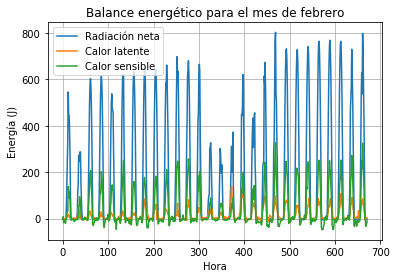

In [42]:
Y1 = df3['Rg_f_mean']          
Y2 = df3['LE_f_mean']       
Y3 = df3['H_f_mean']         

plt.plot(Y1, label="Radiación neta")
plt.xlabel("Hora")                                           
plt.ylabel("Energía (J)")                               

plt.grid()
plt.plot(Y2, label="Calor latente")   
plt.legend()                                                

plt.plot(Y3, label="Calor sensible")  
plt.legend()                                                

plt.title('Balance energético para el mes de febrero')  
plt.savefig('emensual',plt=2000)                        
plt.show()                                          


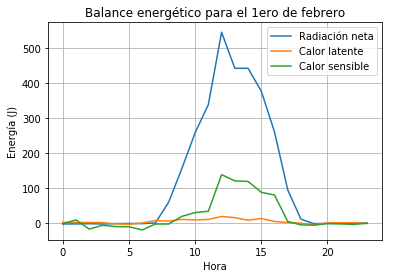

In [44]:

df4=df3[df3['DIA']==1]
df4=df4.reset_index(drop=True)
df4.head()

HORAS=[i for i in range(0,24)]


X = HORAS                           
N = np.arange(24)           
Y1 = df4['Rg_f_mean']       
Y2 = df4['LE_f_mean']       
Y3 = df4['H_f_mean']        

plt.plot(X, Y1, label="Radiación neta")   
plt.xlabel("Hora")                                          
plt.ylabel("Energía (J)")                           

plt.grid()
plt.plot(Y2, label="Calor latente")   
plt.legend()                                                

plt.plot(Y3, label="Calor sensible")
plt.legend()                                        

plt.title('Balance energético para el 1ero de febrero') 
plt.savefig('edia',plt=2000)                            
plt.show()                                                  


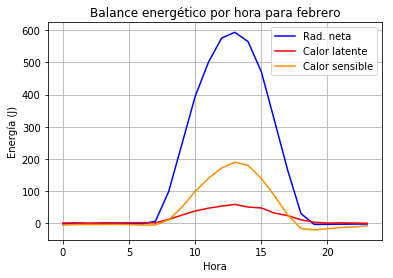

In [45]:
df5=pd.DataFrame()
df5['HORA']=df3['HORA']
df5['FECHA']=df3['FECHA']
df5["Rg_f_mean"] =df3.groupby(["HORA"])["Rg_f_mean"].transform("mean")
df5["LE_f_mean"] =df3.groupby(["HORA"])["LE_f_mean"].transform("mean")
df5["H_f_mean"] =df3.groupby(["HORA"])["H_f_mean"].transform("mean")
df5=df5.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])

X = HORAS                      
N = np.arange(24)           
Y1 = df5['Rg_f_mean']          
Y2 = df5['LE_f_mean']          
Y3 = df5['H_f_mean']           

plt.plot(X, Y1, label="Rad. neta", color = 'b')         
plt.xlabel("Hora")                                      
plt.ylabel("Energía (J)")                               

plt.grid()
plt.plot(Y2, label="Calor latente", color = 'r')
plt.legend()                                            

plt.plot(Y3, label="Calor sensible", color = 'darkorange')  
plt.legend()                                    

plt.title('Balance energético por hora para febrero')   
plt.savefig('ehoramensual',plt=2000)                    
plt.show()                                                  